# Year 2 Coding Challenge Submission

#### Dong, Gengyue \ Liu, Sijin \ Shao, Sicong \ Yan, Yushang \ Zhu, Zheng

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [2]:
# set fonts
import os
from matplotlib import font_manager as fm, rcParams

fpath = os.path.join(matplotlib.get_data_path(), "fonts/ttf/cmr10.ttf")# here is the fonts setting
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]


In [16]:
data= pd.read_csv('healthcare-dataset-stroke-data.csv')
#importing the raw dataset
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [17]:
# preprocessing the label value(discerete)
Value_of_each_line=data[["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]]

In [18]:
def name_of_lines(ylabel):
    print(ylabel,"-----",Value_of_each_line[ylabel].unique())

In [19]:
# show all the categories
for i in range(0,len(Value_of_each_line.columns)):
    name_of_lines(Value_of_each_line.columns[i])

gender ----- ['Male' 'Female' 'Other']
hypertension ----- [0 1]
heart_disease ----- [1 0]
ever_married ----- ['Yes' 'No']
work_type ----- ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type ----- ['Urban' 'Rural']
smoking_status ----- ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke ----- [1 0]


In [20]:
# the amount of the "other" gender it is very few. 
# Thus it will be processed in the latter "miss_data" function
data.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [21]:
#the abnormal value(unknown) of smoking can be processed in the miss_data function.
data.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random
# we need to replace all unknown in smoking_status by other three status with ratio of themselves, replace the unknown in smoking as median
def miss_data(data1: pd.DataFrame)-> pd.DataFrame:
    data_replaced = data1.copy()
    # drop the geneder= Other
    data_replaced = data1.drop(data1[data1['gender']=="Other"].index)
    # to deal with NA in bmi data
    data_replaced_bmi = data_replaced.copy().fillna(value=data_replaced['bmi'].median())
    #to deal with smoking status
    data_replaced_smoking = data_replaced_bmi.replace('Unknown', np.nan)# replace Unkonwn in smoking status with nan
    # data_replaced_smoking.to_csv('202-test.csv')
    # label encode smoking
    classes = set(data_replaced_smoking['smoking_status'])
    values = {list(classes)[i]: i for i in range(len(classes))}
    data_replaced_smoking['smoking_status'] = data_replaced_smoking['smoking_status'].apply(lambda x: values[x])
    data_replaced_smoking1=data_replaced_smoking.copy()
    #the number of people in each smoking status
    length=[]
    for i in range(0,len(classes)):#the ratio of each status include unknown
        k=data_replaced_smoking1.loc[(data_replaced_smoking1['smoking_status'] == i)].shape[0]/data_replaced_smoking['smoking_status'].shape[0]
        length.append(k)
    print(length)
    sum=0
    for i in range(0,len(classes)-1):
        sum+=length[i]
    length1=[]
    for i in range(0,len(classes)-1):
        length1.append(length[i]/sum)
    print(length1)
    length2=[]
    for i in range(len(classes)-1):
        length2.append(i)
    fillvalues=random.choices(length2,length1)
    #replace
    data_replaced_smoking1['smoking_status']=data_replaced_smoking1['smoking_status'].replace(len(classes)-1, np.nan).fillna(value=int(fillvalues[0])).astype(int)
    data_replaced_smoking1.to_csv('1.csv')
    return data_replaced_smoking1

In [23]:
data=miss_data(data)

data.to_csv('after miss data.csv')

data= pd.read_csv('after miss data.csv')

data. drop (columns= data.columns [0], axis= 1 , inplace= True )


[0.37032687414366805, 0.17302798982188294, 0.30221178312781366, 0.15443335290663535]
[0.43796296296296294, 0.2046296296296296, 0.3574074074074074]


In [24]:
# the function 
def precentage_plot(ax):
    ax.spines["top"].set_visible(0)
    ax.spines["right"].set_visible(0)
    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100/data.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
                   ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords="offset points")

In [25]:
discrete_feature=['hypertension', 'heart_disease', 'stroke']
continuous_feature= ['id', 'age', 'avg_glucose_level', 'bmi']

the distribution of the continuous values by count and value


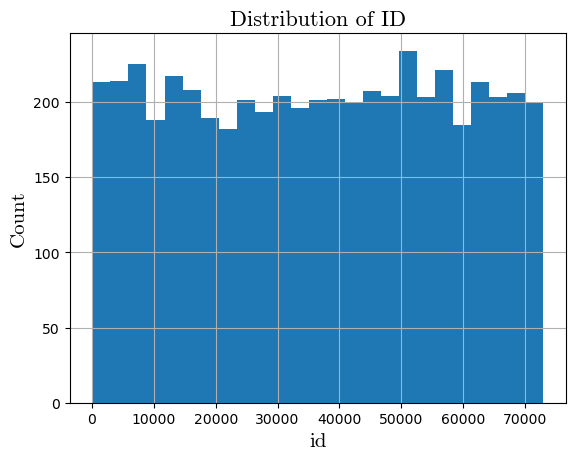

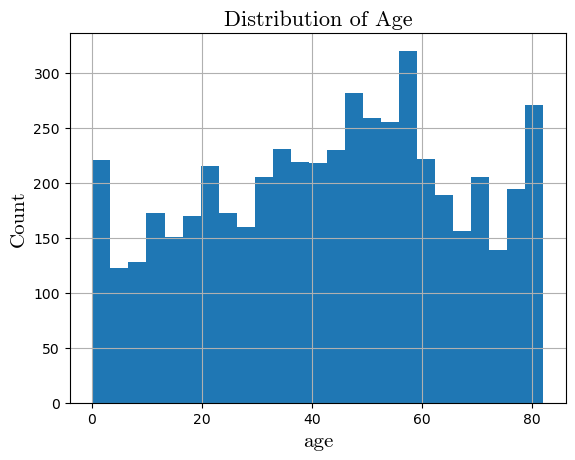

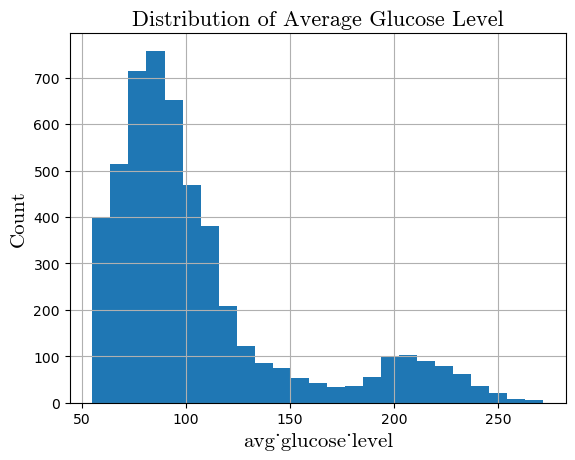

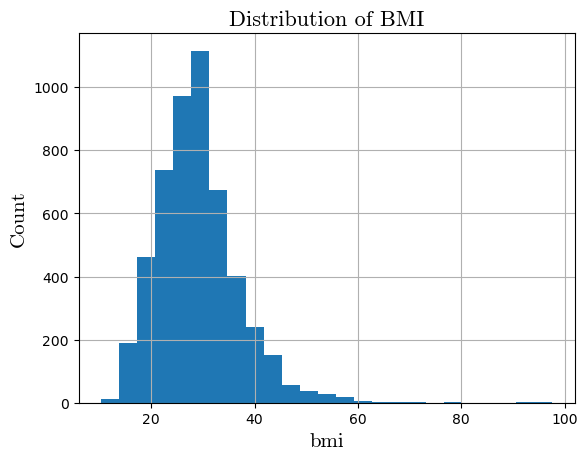

In [26]:
# ploting the graphs of distibutions of ID, Age, Average glucose level and BMI from the dataset, which are all displayed in exact values. 
print( 'the distribution of the continuous values by count and value' )
for i in range(len(continuous_feature)):
    data=data.copy()
    data[continuous_feature[i]].hist(bins=25)
    plt.xlabel(continuous_feature[i],fontproperties=prop,fontsize=15)
    plt.ylabel("Count",fontproperties=prop,fontsize=15)
    title = ['ID','Age','Average Glucose Level','BMI']
    plt.title('Distribution of {}'.format(title[i]),fontproperties=prop,fontsize=16)
    plt.show()

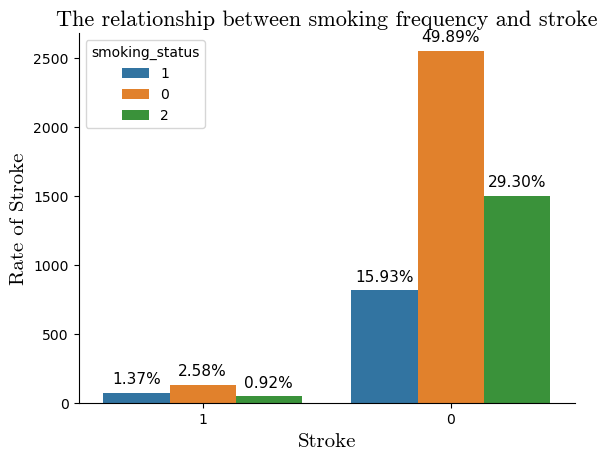

This figure shows the relationship between the smoking status and stroke，where 0, 1 and 2 represent 'formerly smoked', 'never smoked' and 'smokes' respectively.Among those who once had a stroke, plenty of them never smoked.
However, most of people who never had a stroke did not smoke either. So it is hard to conclude that smoking is more likely leading to stroke.


In [27]:
#the smoking data after missing data processing, there is no the unknown data.
ax = sns.countplot(x="stroke",hue="smoking_status",data=data.astype(str))
ax.set_title('The relationship between smoking frequency and stroke',fontproperties=prop,fontsize=16)
plt.ylabel("Rate of Stroke",fontproperties=prop,fontsize=15)
plt.xlabel("Stroke",fontproperties=prop,fontsize=15)
precentage_plot(ax)
plt.show()
print("This figure shows the relationship between the smoking status and stroke，where 0, 1 and 2 represent 'formerly smoked', 'never smoked' and 'smokes' respectively.Among those who once had a stroke, plenty of them never smoked.\nHowever, most of people who never had a stroke did not smoke either. So it is hard to conclude that smoking is more likely leading to stroke.")

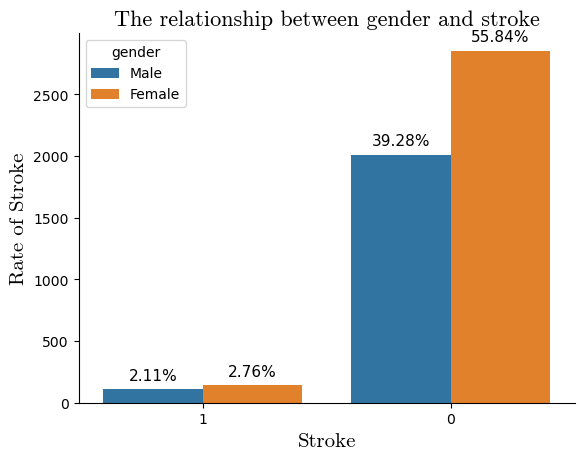

The bar chart above show how gender is linked to stroke. The number of women having stroke is greater than that of men, while women has a larger proprtion in the cases without stroke. As the number of men and women is not even in the data collected, much more female data is collected.It is not clear that whether women are easier to have a stroke.


In [28]:
%matplotlib inline
ax = sns.countplot(x="stroke",hue="gender",data=data.astype(str))
plt.title('The relationship between gender and stroke',fontproperties=prop,fontsize=16)
plt.ylabel("Rate of Stroke",fontproperties=prop,fontsize=15)
plt.xlabel("Stroke",fontproperties=prop,fontsize=15)
precentage_plot(ax)
plt.show()
print('The bar chart above show how gender is linked to stroke. The number of women having stroke is greater than that of men, while women has a larger proprtion in the cases without stroke. As the number of men and women is not even in the data collected, much more female data is collected.It is not clear that whether women are easier to have a stroke.')

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


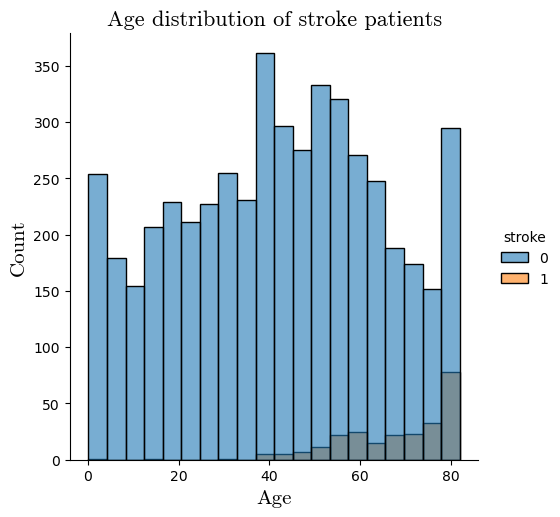

The relationship between stroke and age is shown in the graph above. People are relatively easy to get stroke after 
the age of 40. The chance of having a stroke increases as people getting older. 


In [29]:
%matplotlib inline
sns.displot(x='age', hue='stroke', data=data, alpha=0.6)
plt.title('Age distribution of stroke patients',fontproperties=prop,fontsize=16)
plt.ylabel("Count",fontproperties=prop,fontsize=15)
plt.xlabel("Age",fontproperties=prop,fontsize=15)
plt.show()

print("The relationship between stroke and age is shown in the graph above. People are relatively easy to get stroke after \nthe age of 40. The chance of having a stroke increases as people getting older. ")

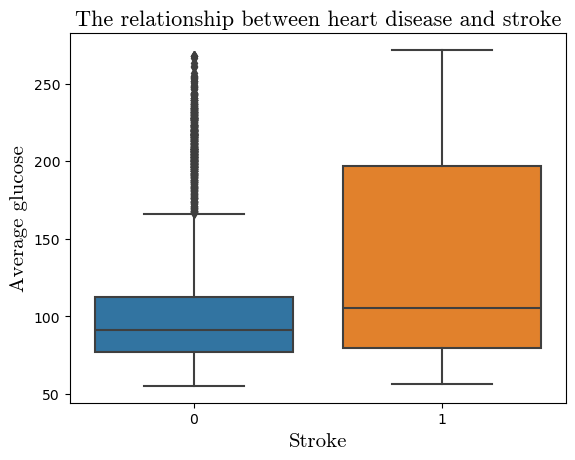

The average glucose level for non-stroke people is more separated than that of people had a stroke. For stroke people, their average glucose level is within a relatively stable range.


In [30]:
sns.boxplot(x="stroke",y="avg_glucose_level",data=data)
plt.title('The relationship between heart disease and stroke',fontproperties=prop,fontsize=16)
plt.ylabel("Average glucose",fontproperties=prop,fontsize=15)
plt.xlabel("Stroke",fontproperties=prop,fontsize=15)

plt.show()
print('The average glucose level for non-stroke people is more separated than that of people had a stroke. For stroke people, their average glucose level is within a relatively stable range.')

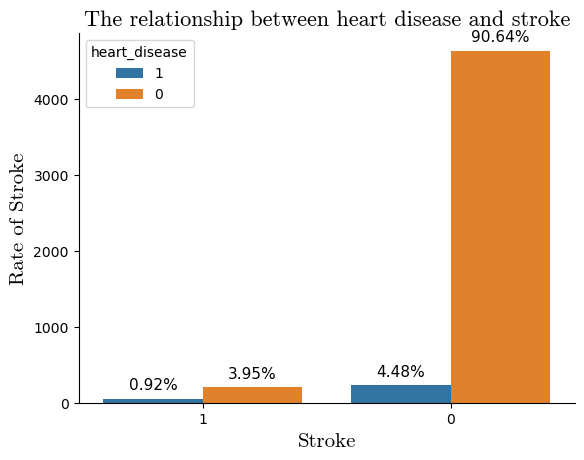

People without heart disesases are the majority in both stroke and non-stroke cases. As the population of  The relationship between heart disease and stroke is unclear.


In [31]:
ax=sns.countplot(x=  "stroke",hue="heart_disease",data=data.astype(str))
plt.title('The relationship between heart disease and stroke',fontproperties=prop,fontsize=16)
plt.ylabel("Rate of Stroke",fontproperties=prop,fontsize=15)
plt.xlabel("Stroke",fontproperties=prop,fontsize=15)
precentage_plot(ax)
plt.show()
print("People without heart disesases are the majority in both stroke and non-stroke cases. As the population of  The relationship between heart disease and stroke is unclear.")

In [33]:
# find the relationship between each other. ID is not used
corrData = data.drop(columns=['id'],axis=1).apply(lambda x:pd.factorize(x)[0])
corr=corrData.corr()
corr
#corr.drop(columns=['Unnamed: 0'],axis =1)
#corr.drop(index=['Unnamed: 0'],axis =0)



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.015024,-0.021223,0.085685,-0.030171,-0.065848,-0.006105,0.007023,0.027895,-0.016300,0.009081
age,-0.015024,1.000000,-0.221835,0.202414,0.549578,0.292823,0.018922,0.071655,0.148922,0.300536,0.214003
hypertension,-0.021223,-0.221835,1.000000,-0.108292,-0.164187,-0.075150,0.007980,-0.048336,-0.037173,-0.128963,-0.127891
heart_disease,0.085685,0.202414,-0.108292,1.000000,0.114601,0.058301,0.003045,0.054081,0.088415,0.082669,0.134905
ever_married,-0.030171,0.549578,-0.164187,0.114601,1.000000,0.376238,0.005988,0.027844,0.113511,0.321430,0.108299
work_type,-0.065848,0.292823,-0.075150,0.058301,0.376238,1.000000,-0.014426,0.028647,0.179550,0.315197,0.058261
Residence_type,-0.006105,0.018922,0.007980,0.003045,0.005988,-0.014426,1.000000,0.006394,-0.030053,0.005991,0.015415
avg_glucose_level,0.007023,0.071655,-0.048336,0.054081,0.027844,0.028647,0.006394,1.000000,0.113251,0.014785,0.350598
bmi,0.027895,0.148922,-0.037173,0.088415,0.113511,0.179550,-0.030053,0.113251,1.000000,0.093517,0.191032
smoking_status,-0.016300,0.300536,-0.128963,0.082669,0.321430,0.315197,0.005991,0.014785,0.093517,1.000000,0.074057


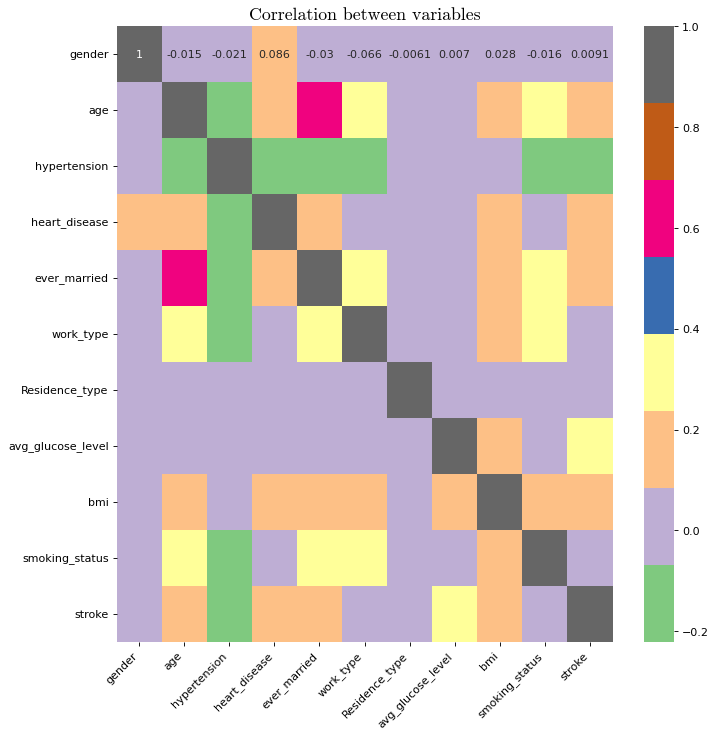

The correlation between variables after applying feature scaling to the data set. It shows that, except from gender,
all other fators are more closely connected with stroke. The following training of the classifiers will use those data to complete training and testing process.


In [34]:
plt.figure(figsize=(10,10),dpi=80)
ax = sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="Accent",annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Correlation between variables",fontproperties=prop,fontsize=16)
plt.show()
print("The correlation between variables after applying feature scaling to the data set. It shows that, except from gender,\nall other fators are more closely connected with stroke. The following training of the classifiers will use those data to complete training and testing process.")
# higher absolute value means higher relationship bewteen two things before eliminating all the outlier data.

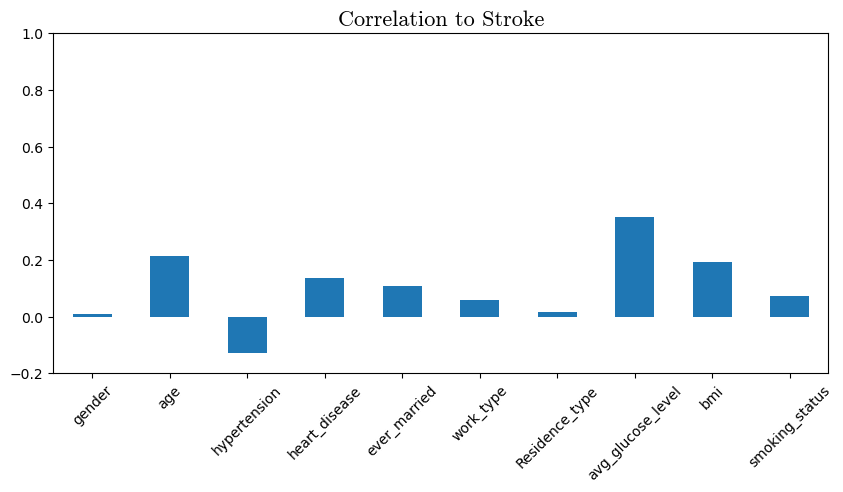

In [35]:
#Corrleation
relationship=corr.iloc[-1,:-1]
plt.figure(figsize=(10,5))
relationship.plot(kind="bar")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.ylim(-.2,1)
plt.subplots_adjust(bottom=0.2)
plt.title("Correlation to Stroke",fontproperties=prop,fontsize=16)
plt.show()


In [36]:
from typing import Union
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
# select data from different places(in other words, select data after shuffling the dataset)


In [37]:
# prepare feature scaling for the dataset
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
def scaler(data:pd.Series, kind ='minmax')-> pd.Series:\
    
    assert kind in ['minmax', 'standard']
    
    if kind =='minmax':
        min_value = min(data)
        max_value = max(data)
        diff = max_value - min_value
        new=(data - min_value)/ diff
        
    else:
        mean = data.mean()
        std = data.std()
        new = (data-mean)/ std
        
    return new 

In [38]:
categories = ['gender','work_type','ever_married','Residence_type','smoking_status']
data_1 = data.copy()

data_1['avg_glucose_level'] = scaler(data_1['avg_glucose_level'],kind ='minmax')
data_1['bmi'] = scaler(data_1['bmi'],kind ='minmax')
data_2=data_1

label_enc=LabelEncoder()
for i in categories:
    data_2[i]= label_enc.fit_transform(data_2[i])
    data_2[i].unique()
data_2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,0.801265,0.301260,1,1
1,51676,0,61.0,0,0,1,3,0,0.679023,0.203895,0,1
2,31112,1,80.0,0,1,1,2,0,0.234512,0.254296,0,1
3,60182,0,49.0,0,0,1,2,1,0.536008,0.276060,0,1
4,1665,0,79.0,1,0,1,3,0,0.549349,0.156930,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,0,80.0,1,0,1,2,1,0.132167,0.203895,0,0
5105,44873,0,81.0,0,0,1,3,1,0.323516,0.340206,0,0
5106,19723,0,35.0,0,0,1,3,0,0.128658,0.232532,0,0
5107,37544,1,51.0,0,0,1,2,0,0.513203,0.175258,1,0


In [39]:
#processing(delete) abnormal if two value for one row is abnormal the data is abnormal
from collections import Counter
def abnormal_finder(data,n,features):
    index_of_abnormal=[]
    for i in features:
            #20%percentile
        lower_point=np.percentile(data[i],20)
            #80%percentile
        upper_point=np.percentile(data[i],80)
        value_difference=upper_point-lower_point
        #limitation to judge whether is abnormal
        lower_limit = lower_point-1.5*value_difference
        upper_limit = upper_point+1.5*value_difference
        abnormal_index = data[(data[i]<lower_limit)|(data[i]>upper_limit)].index
        index_of_abnormal.extend(abnormal_index)
    index_of_abnormal = Counter(index_of_abnormal)
    more_outliers = list(k for k,v in index_of_abnormal.items() if v>=n)
    return more_outliers

In [40]:
abnormals = abnormal_finder(data_2,2,["avg_glucose_level","bmi"])
data_2 = data_2.drop(abnormals,axis=0).reset_index(drop=True)
#data_2 = data_2.drop(columns = ['Unnamed: 0'],axis =1)
data_2
data_2.to_csv('after dropping abnormals.csv')
# The outliers in data_2 have been removed 
data_3 = data_2.drop(columns=['id','stroke'],axis = 1)
data_3
data_3.to_csv('after dropping abnormal and id_stroke_coloums.csv')
# The data within 'id', 'gender' and 'stroke' is removed from the dataset as they are not so relavent to the stroke prediction.

In [41]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix#confusion matrix
from sklearn.metrics import silhouette_score#Contour factor
from sklearn.metrics import make_scorer #Create a scoring standard from performance indicators or loss functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE #Random sampling to deal with the problem of unbalanced data
from imblearn.under_sampling import RandomUnderSampler #Random sampling to deal with data imbalance

x= data_3
y= data_2['stroke'].values
spl = StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=1)
for train_index,test_index in spl.split(x,y):
    print("train:",train_index,"test:",test_index)
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test = y[train_index],y[test_index]
# As the stroke sample data is not evenly distributed among the data set, 'SMOTE' function is imported to resolve this.    
smo = SMOTE(sampling_strategy='minority',random_state=42)
x_smo,y_smo = smo.fit_resample(x_train,y_train)
print(x_smo.shape,y_smo.shape)




train: [ 429 1142 3526 ... 2029 2555 3878] test: [4873 2734 3642 ... 3786 1941 1913]
train: [ 615 4781 3017 ...  771 2689  551] test: [1712 4311 2686 ...  923 4330 4367]
train: [  31 2142 1969 ... 2533 1102 3411] test: [3089 2792 4300 ... 1459 3057 3292]
train: [4613 2762 1327 ... 4440 2179  915] test: [1114 3087  644 ... 1381  103 4834]
train: [4141 2522 3476 ...   77 1015 3987] test: [3601 4278 1314 ... 2359 3777 2558]
(7752, 10) (7752,)


In [42]:
# import the Classifiers
a=RandomForestClassifier()
b=SVC()
c=LogisticRegression()
d=KNeighborsClassifier()
e=DecisionTreeClassifier()
Classifiers=[
    ["Random Forest",a],
    ["Support Vector Machine",b],
    ["LogisticRegression",c],
    ["KNN",d],
    ["Decision Tree",e],
]
#train the classifiers
Classify_result=[]
names=[]
prediction=[]

# a list to store all the metrics
recall_list = []
precision_list = []
f1_list = []
accuracy_list = []

for name,classifier in Classifiers:
    classifier = classifier
    #training
    classifier.fit(x_smo,y_smo)
    #classifier.fit(x_train, y_train)
    #predict
    y_pred = classifier.predict(x_test)
    #recall score
    recall = recall_score(y_test,y_pred)
    recall_list.append(recall_score(y_test,y_pred))
    #precision score
    precision = precision_score(y_test,y_pred)
    precision_list.append(precision_score(y_test,y_pred))
    #f1_score, the overall result of recall and precision
    f1 = f1_score(y_test,y_pred)
    f1_list.append(f1_score(y_test,y_pred))
    #accuracy
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_list.append(accuracy_score(y_test,y_pred))
    #combine of the evaluated performance
    class_eva = pd.DataFrame([recall,precision,f1,accuracy])
    Classify_result.append(class_eva)
    # name of the classifier used
    name=pd.Series(name)
    names.append(name)
    #predict results
    y_pred = pd.Series(y_pred)
    print('In the training process of {0}, the total number of prediction made is {1}, which is 20% of the dataset. {2} samples are tested positive for stroke and {3} samples are testd negative.'.format(classifier , len(y_pred), Counter(y_pred)[1],Counter(y_pred)[0]) )
    print(" \n")
    prediction.append(y_pred)
print(a.feature_importances_)
    
     


In the training process of RandomForestClassifier(), the total number of prediction made is 1019, which is 20% of the dataset. 93 samples are tested positive for stroke and 926 samples are testd negative.
 

In the training process of SVC(), the total number of prediction made is 1019, which is 20% of the dataset. 350 samples are tested positive for stroke and 669 samples are testd negative.
 

In the training process of LogisticRegression(), the total number of prediction made is 1019, which is 20% of the dataset. 261 samples are tested positive for stroke and 758 samples are testd negative.
 

In the training process of KNeighborsClassifier(), the total number of prediction made is 1019, which is 20% of the dataset. 163 samples are tested positive for stroke and 856 samples are testd negative.
 

In the training process of DecisionTreeClassifier(), the total number of prediction made is 1019, which is 20% of the dataset. 115 samples are tested positive for stroke and 904 samples are 

D:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
names = pd.DataFrame(names)
names = names[0].tolist()
#combine the score from the training process
result = pd.concat(Classify_result,axis=1)
result.columns = names
result.index=["recall","precision","F1_score","accuracy_score"]
result

result.to_csv("the performance of classifiers.csv")

In [44]:
# cls=['Random Forest','Support Vector Machine','Logistic Regression','KNN','Decision Tree']
# for i in range(len(cls)):
    

In [45]:

%matplotlib nbagg
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
import matplotlib.widgets
import seaborn as sns

import mpld3

from mpld3 import plugins, utils
recall_list = []
precision_list = []
f1_list = []
accuracy_list = []

#import csv function to enable reading the .csv files by rows.
with open('the performance of classifiers.csv','r') as f:
    reader= csv.reader(f)
    result2= list(reader)
    for i in range(1,5):
        del result2[i][0]# delete the heading of the selected row, leaving all the numbers 
    recall_list = result2[1]
    precision_list=result2[2]
    f1_list =result2[3]
    accuracy_list =result2[4]
    #convert all the strings in the list to float
    recall_list=list(map(float,recall_list))
    precision_list=list(map(float,precision_list))
    f1_list=list(map(float,f1_list))
    accuracy_list=list(map(float,accuracy_list))
    print(recall_list, accuracy_list)



[0.2, 0.82, 0.56, 0.36, 0.3] [0.8792934249263984, 0.6879293424926398, 0.7497546614327772, 0.8263002944062807, 0.8675171736997056]


In [46]:
# create figure and axes - shift to the right
fig, ax = plt.subplots(figsize = (20,40))
categories = ['recall','precision','f1_score','accuracy']
models = ["Random Forest","Support Vector Machine","LogisticRegression","KNN",'Decision Tree']
metrics = [recall_list, precision_list, f1_list ,accuracy_list]
# plot the results
%matplotlib nbagg
fig, ax = plt.subplots(figsize=(9,9))
plt.subplots_adjust(left=0.45)
plt.subplots_adjust(bottom=0.3)
ax.set_title("Performance ",fontproperties=prop,fontsize=16)
colours = []
for i in range(len(metrics)):
    for j in range(len(models)):
        colours.append((np.random.random(),np.random.random(),np.random.random()))


xticks1 = []

# allocate prediction to array
for i, model in enumerate(models):
    for j, name in enumerate(categories):
        if j == 0:
            ax.bar(f'{model}_{name}', 
               metrics[j][i], 
               alpha=0.5, 
               width = 0.5, 
               facecolor = (np.random.random(),np.random.random(),np.random.random()), 
               edgecolor = 'white', 
               label = f'{models[i]}_{categories[j]}', 
               lw=0.5,
                )
            xticks1.append(f'{models[i]}_{categories[j]}')
        else:
            ax.bar(f'{model}_{name}', 
                metrics[j][i], 
                alpha=0.05, 
                width = 0.5, 
                facecolor = (np.random.random(),np.random.random(),np.random.random()), 
                edgecolor = 'white', 
                label= f'{models[i]}_{categories[j]}', 
                lw=0.5)
            xticks1.append(f'{models[i]}_{categories[j]}')
#set_xticks and font of ticks
plt.xticks(rotation=270)
print(xticks1)
# add colorbar
 
radio_ax = plt.axes( 
    [0.05, 0.05, 0.15, 0.2],
    facecolor='#FFDDAA'
)
    
# create radio buttons
radio = matplotlib.widgets.RadioButtons(
    radio_ax, 
    categories,
)


# callback function to run when buttons are pressed
def callback(label: str):
    """Changes the transparency of `lines`"""
    ax.cla()
    xticks = range(0,len(xticks1), 1)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks1,rotation=270)
    ax.set_title("Performance ",fontproperties=prop,fontsize=16)
    for i, model in enumerate(models):
        for j, name in enumerate(categories):
            if name == label:
                ax.bar(f'{name}_{model}', 
                   metrics[j][i], 
                   alpha=0.5, 
                   width = 0.5, 
                   edgecolor = 'white', 
                   label=f'{models[i]}_{categories[j]}', 
                   lw=0.5)
            else:
                ax.bar(f'{name}_{model}', 
                    metrics[j][i], 
                    alpha=0.05, 
                    width = 0.5, 
                    edgecolor = 'white', 
                    label= f'{models[i]}_{categories[j]}', 
                    lw=0.5)
    ax.legend(bbox_to_anchor=(-0.9, 0), loc=3, borderaxespad=0)
    ax.show()
# connect function to radio object and show
radio.on_clicked(callback)

ax.legend(bbox_to_anchor=(-0.9, 0), loc=3, borderaxespad=0)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['Random Forest_recall', 'Random Forest_precision', 'Random Forest_f1_score', 'Random Forest_accuracy', 'Support Vector Machine_recall', 'Support Vector Machine_precision', 'Support Vector Machine_f1_score', 'Support Vector Machine_accuracy', 'LogisticRegression_recall', 'LogisticRegression_precision', 'LogisticRegression_f1_score', 'LogisticRegression_accuracy', 'KNN_recall', 'KNN_precision', 'KNN_f1_score', 'KNN_accuracy', 'Decision Tree_recall', 'Decision Tree_precision', 'Decision Tree_f1_score', 'Decision Tree_accuracy']


If the patient is predicted to have stroke, prediction = 1, otherwise prediction = 0
If the patient actually had a stroke, real = 1, otherwise real = 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

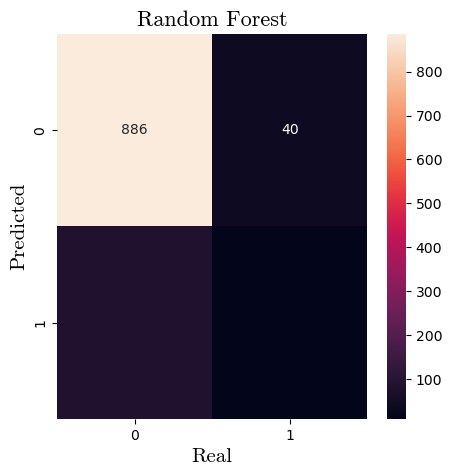

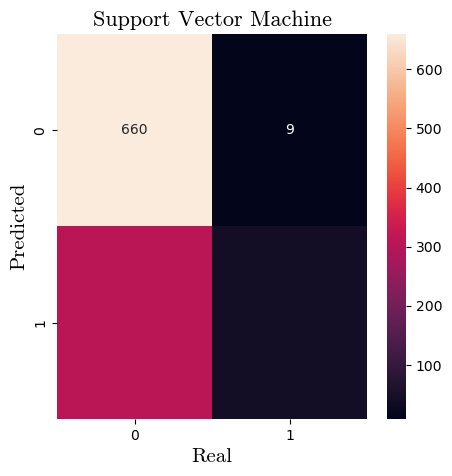

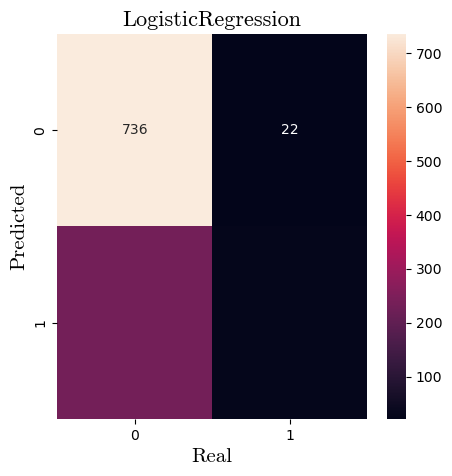

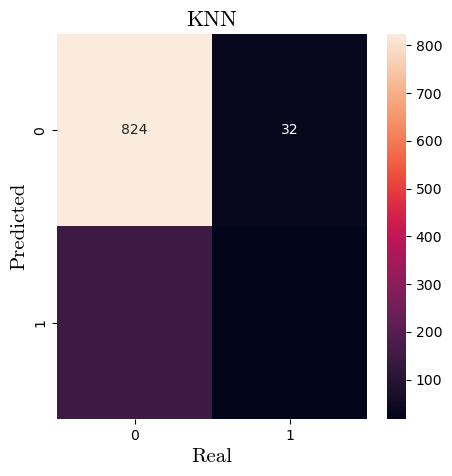

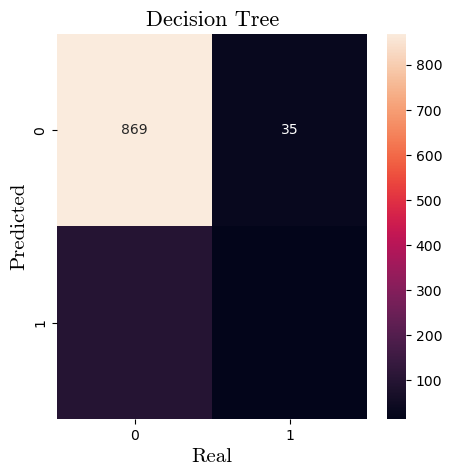

The best classifier under the condition that we applied is Rondom Forest Classifier.


In [47]:
# print explainations
print('If the patient is predicted to have stroke, prediction = 1, otherwise prediction = 0')
print('If the patient actually had a stroke, real = 1, otherwise real = 0')

# plot the results
titles = ['Random Forest','Support Vector Machine','LogisticRegression','KNN','Decision Tree']
%matplotlib inline
for i in range(len(prediction)):
    fig, ax = plt.subplots(figsize=(5,5))
    # allocate prediction to array
    array = np.zeros((2, 2))
    for j, correct_value in enumerate(y_test):
        predicted_value = list(prediction[i])[j]
        array[int(predicted_value), int(correct_value)] += int(1)


    df_cm = pd.DataFrame(array)
    ax = sns.heatmap(df_cm,annot=True,fmt='.20g')
    # plot array as image
    # im = ax.imshow(array,origin='lower',cmap='hot_r')



    # label axes
    ax.set_xlabel('Real',fontproperties=prop,fontsize=15)
    ax.set_ylabel('Predicted',fontproperties=prop,fontsize=15)
    #set titles
    ax.set_title(titles[i],fontproperties=prop,fontsize=16)
plt.show()
print("The best classifier under the condition that we applied is Rondom Forest Classifier.")

In [48]:
#calculate the importance
categories = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
print(a)
print(a.feature_importances_)
importances = pd.Series(data=a.feature_importances_, index= categories)
# explaination
print('This corrleation bar chart is predicted by Random Forest due to the highest accurancy value')

#print the interactive graph which shows the corrolation between every one of the variable and stroke.
%matplotlib nbagg
    
# create figure and axes - shift to the right
fig, ax = plt.subplots(figsize = (10,10))
plt.subplots_adjust(left=0.4)
plt.subplots_adjust(bottom=0.3)
plt.xticks(rotation=280)
ax.set_title('Correlation to Stroke',fontproperties=prop,fontsize=16)


# label
ax.set_xlabel('Categories',fontproperties=prop,fontsize=15)
ax.set_ylabel('Importances',fontproperties=prop,fontsize=15)

# create colour palette
colours = [(np.random.random(),np.random.random(),np.random.random()) for i in range(len(categories))]
# iterate over all categories
for i in range(len(categories)):
    
    if i == 0:
#         lines[name] = 
        ax.bar(categories[i], importances[i] , alpha=0.9, width = 0.9, facecolor = colours[i], edgecolor = 'white', label='one', lw=0.5)
   
    else:
        #lines[name] = 
        ax.bar(categories[i], importances[i], alpha=0.1, width = 0.9, facecolor = colours[i], edgecolor = 'white', label='one', lw=0.5)
# create radio box
radio_ax = plt.axes(
    [0.05, 0.45, 0.2, 0.3], 
    facecolor='#FFDDAA'
    
)

# create radio buttons
radio = matplotlib.widgets.RadioButtons(
    radio_ax, 
    categories,
)

# callback function to run when buttons are pressed 
def callback(label:str):
    ax.cla()  
    ax.set_xlabel('Categories',fontproperties=prop,fontsize=15)
    ax.set_ylabel('Importances',fontproperties=prop,fontsize=15)
    xticks = range(0,len(categories), 1)
    ax.set_xticks(xticks)
    ax.set_xticklabels(categories,rotation=280)
    ax.set_title('Correlation to Stroke',fontproperties=prop,fontsize=16)
    
    for i in range(len(categories)):

        # set default value to darker
        if label == categories[i]:
            ax.bar(categories[i], importances[i], alpha=0.9, width = 0.9, facecolor = colours[i], edgecolor = 'white', label='one', lw=0.5)
        else:
            ax.bar(categories[i], importances[i], alpha=0.1, width = 0.9, facecolor = colours[i], edgecolor = 'white', label='one', lw=0.5)
         
# connect function to radio object and show
radio.on_clicked(callback)
plt.show()

RandomForestClassifier()
[0.0337103  0.47304278 0.01657294 0.01223337 0.0170474  0.05701199
 0.0209307  0.15565952 0.17044273 0.04334827]
This corrleation bar chart is predicted by Random Forest due to the highest accurancy value


<IPython.core.display.Javascript object>

C:\Users\15813\AppData\Local\Temp\ipykernel_1236\3420945989.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar(categories[i], importances[i] , alpha=0.9, width = 0.9, facecolor = colours[i], edgecolor = 'white', label='one', lw=0.5)
C:\Users\15813\AppData\Local\Temp\ipykernel_1236\3420945989.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar(categories[i], importances[i], alpha=0.1, width = 0.9, facecolor = colours[i], edgecolor = 'white', label='one', lw=0.5)


In [49]:
print('In the chellenge, we use the SVM(SVC), Random forest,Decision tree,KNN,Logistic Regression. The best one is the Random forest, because it has highest accurancy.\n We use the SMOTE function in imblearn moudle to process the data due to too few amount of the Stroke Data.\n At the upper part, we draw a heatmap and bar chart to show the correlation of the each feature to Stroke without the machine learn.\n We also show the Correlation by the best classifier--Random forest.\nThey show that age, average glucose level, bmi are the most important reason of the Stroke occuring.\nWe use the confusion matrix to show the detailed accurancy of each classifier.\nWe use a interactive graph to show the performance of each classifier.')

In the chellenge, we use the SVM(SVC), Random forest,Decision tree,KNN,Logistic Regression. The best one is the Random forest, because it has highest accurancy.
 We use the SMOTE function in imblearn moudle to process the data due to too few amount of the Stroke Data.
 At the upper part, we draw a heatmap and bar chart to show the correlation of the each feature to Stroke without the machine learn.
 We also show the Correlation by the best classifier--Random forest.
They show that age, average glucose level, bmi are the most important reason of the Stroke occuring.
We use the confusion matrix to show the detailed accurancy of each classifier.
We use a interactive graph to show the performance of each classifier.
